In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pytorch-challange-flower-dataset/sample_submission.csv
/kaggle/input/pytorch-challange-flower-dataset/README.md
/kaggle/input/pytorch-challange-flower-dataset/cat_to_name.json
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/7/image_07216.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/47/image_04957.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/47/image_04989.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/47/image_05007.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/17/image_03876.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/17/image_03829.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/17/image_03908.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/17/image_03843.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/17/image_03883.jpg
/kaggle/input/pytorch-challange-flower-dataset/dataset/valid/17/image_03831.jpg
/kaggle/inp

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,       
    width_shift_range=0.1,   
    height_shift_range=0.1,  
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True,    
    fill_mode='nearest'     
)

# Load and preprocess your images
train_generator = datagen.flow_from_directory(
    '/kaggle/input/pytorch-challange-flower-dataset/dataset/train',
    target_size=(224, 224 ),  
    
    class_mode='categorical'  
)
validation_generator = datagen.flow_from_directory(
    '/kaggle/input/pytorch-challange-flower-dataset/dataset/valid',
    target_size=(224, 224 ),  
    class_mode='categorical'  
)



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input

In [4]:
resnet_model = ResNet50(include_top=False , weights='imagenet'
                      ,input_shape=(224,224,3)
                       )
resnet_model.trainable = True

94765736/94765736 [==============================] - 1s 0us/step


In [5]:
model = tf.keras.models.Sequential([
    resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(102,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
fit_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    )

Epoch 1/5
205/205 [==============================] - 196s 694ms/step - loss: 4.3018 - accuracy: 0.0966 - val_loss: 5.6753 - val_accuracy: 0.0831
Epoch 2/5
205/205 [==============================] - 103s 503ms/step - loss: 2.8585 - accuracy: 0.2877 - val_loss: 4.9161 - val_accuracy: 0.1467
Epoch 3/5
205/205 [==============================] - 105s 512ms/step - loss: 2.1104 - accuracy: 0.4347 - val_loss: 2.8584 - val_accuracy: 0.3631
Epoch 4/5
205/205 [==============================] - 105s 512ms/step - loss: 1.6081 - accuracy: 0.5505 - val_loss: 2.3376 - val_accuracy: 0.4523
Epoch 5/5
205/205 [==============================] - 106s 516ms/step - loss: 1.3421 - accuracy: 0.6219 - val_loss: 2.5910 - val_accuracy: 0.4352


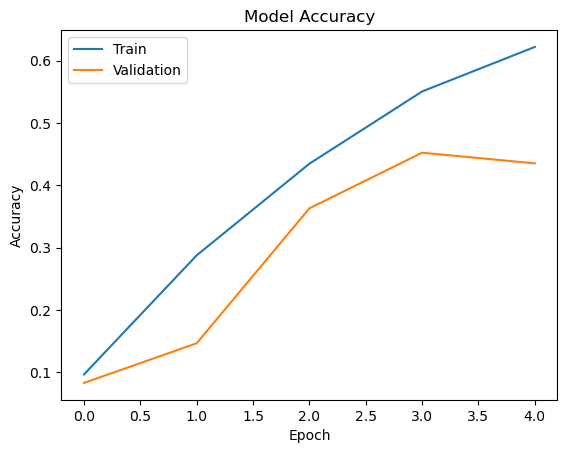

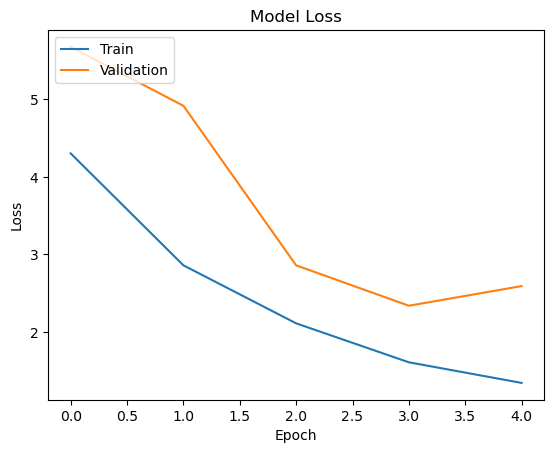

In [7]:
import matplotlib.pyplot as plt

plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
